In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [201]:
df = pd.read_csv("world_happiness_combined.csv", delimiter=';')

# Veri içeriği

In [202]:
df.head(5)

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015


In [203]:
df = df.drop(columns=["Ranking"])

In [204]:
df.isnull().sum()

Country                         0
Regional indicator              3
Happiness score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64

# Boş olan hücrelerin incelenmesi

In [205]:
empty_cells = df[df["Regional indicator"].isna()]
empty_cells

,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
394,Greece,NaN,"5,22700","6,89283","0,76955",71,"0,14543","0,00000","0,09324",2017
673,Cyprus,NaN,"6,04580","7,50051","0,75329",77,"0,64287","0,33664","0,08973",2019
743,Gambia,NaN,"4,51630","1,82777","0,57836",66,"0,60555","0,47478","0,36920",2019


In [206]:
greece_region = df[df["Country"] == "Greece"]["Regional indicator"]
greece_region 

101                   Western Europe
288                   Western Europe
394                              NaN
520                   Western Europe
705     Middle East and North Africa
855     Middle East and North Africa
979     Middle East and North Africa
1127    Middle East and North Africa
1282    Middle East and North Africa
1408    Middle East and North Africa
Name: Regional indicator, dtype: object

In [207]:
unique_countries = df["Country"].unique().tolist()

wrongregionofcountry = []
mostcommons = []

for country in unique_countries:
    regional = df[df["Country"] == f"{country}"]["Regional indicator"].tolist()
    
    if len(set(regional)) != 1:
        wrongregionofcountry.append(country)
        most_common = max(regional, key=regional.count)
        mostcommons.append(most_common)
        
for index, country in enumerate(wrongregionofcountry):
    df.loc[df["Country"] == f"{country}", "Regional indicator"] = f"{mostcommons[index]}"

### Veri türü kontrolü

In [208]:
df.dtypes
# Happiness score, GDP per capita, Social support, Freedom to make life choices, Generosity, Perceptions of corruption --> nonnumeric      

Country                         object
Regional indicator              object
Happiness score                 object
GDP per capita                  object
Social support                  object
Healthy life expectancy          int64
Freedom to make life choices    object
Generosity                      object
Perceptions of corruption       object
Year                             int64
dtype: object

In [209]:
columns_to_convert = [
    'GDP per capita', 'Social support', 'Freedom to make life choices', 
    'Generosity', 'Perceptions of corruption', 'Happiness score'
]

df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True).astype(float)

df.dtypes

Country                          object
Regional indicator               object
Happiness score                 float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy           int64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Year                              int64
dtype: object

In [210]:
df.head()

,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015
1,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015
2,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015
3,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015
4,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015


# Veri görselleştirme

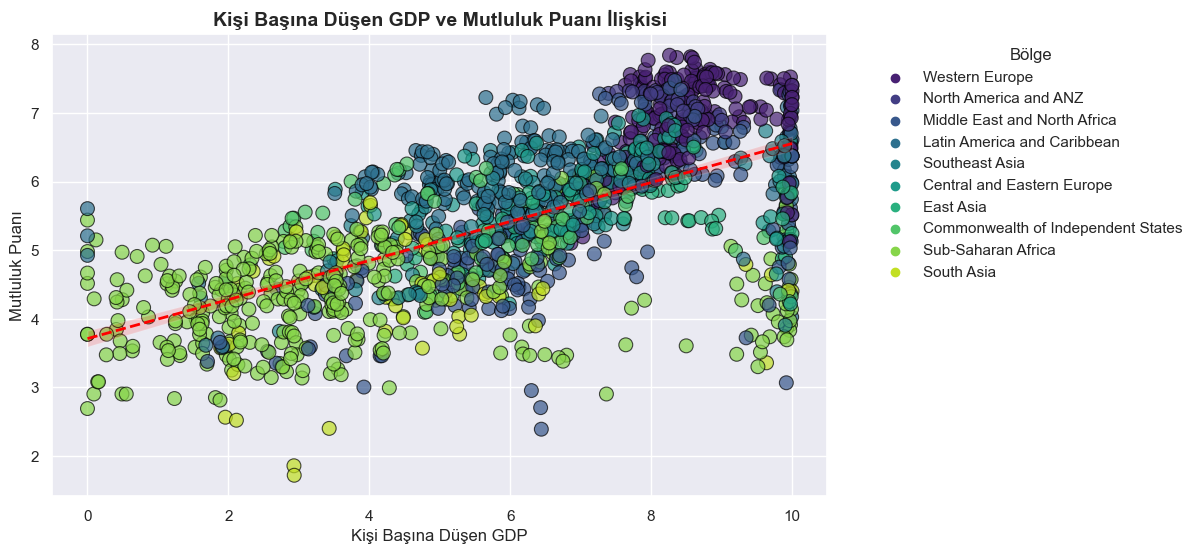

In [211]:
sns.set_style("darkgrid") 

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    x=df["GDP per capita"], 
    y=df["Happiness score"], 
    hue=df["Regional indicator"],  
    palette="viridis", 
    s=100,  
    alpha=0.7, 
    edgecolor="black"  
)


sns.regplot(
    x=df["GDP per capita"], 
    y=df["Happiness score"], 
    scatter=False, 
    color="red", 
    line_kws={"linewidth": 2, "linestyle": "--"}  
)


plt.title("Kişi Başına Düşen GDP ve Mutluluk Puanı İlişkisi", fontsize=14, fontweight="bold")
plt.xlabel("Kişi Başına Düşen GDP", fontsize=12)
plt.ylabel("Mutluluk Puanı", fontsize=12)


plt.legend(title="Bölge", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.show()

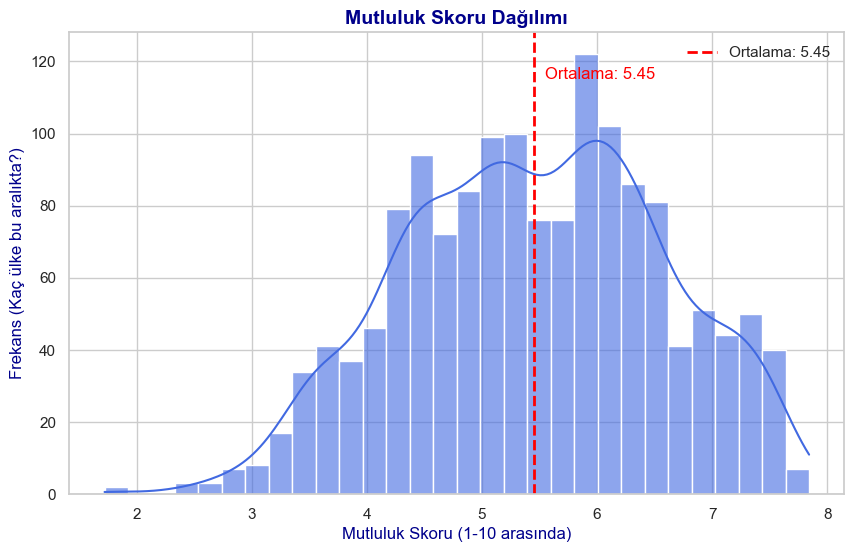

In [212]:
sns.set_theme(style="whitegrid", palette="Blues")

plt.figure(figsize=(10, 6))
sns.histplot(df["Happiness score"], bins=30, kde=True, color="royalblue", alpha=0.6)  # Saydamlık eklendi

plt.title("Mutluluk Skoru Dağılımı", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Mutluluk Skoru (1-10 arasında)", fontsize=12, color="darkblue")
plt.ylabel("Frekans (Kaç ülke bu aralıkta?)", fontsize=12, color="darkblue")

mean_value = df["Happiness score"].mean()
plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label=f"Ortalama: {mean_value:.2f}")

plt.text(mean_value + 0.1, plt.ylim()[1] * 0.9, f"Ortalama: {mean_value:.2f}", color="red", fontsize=12)

plt.legend()

plt.show()

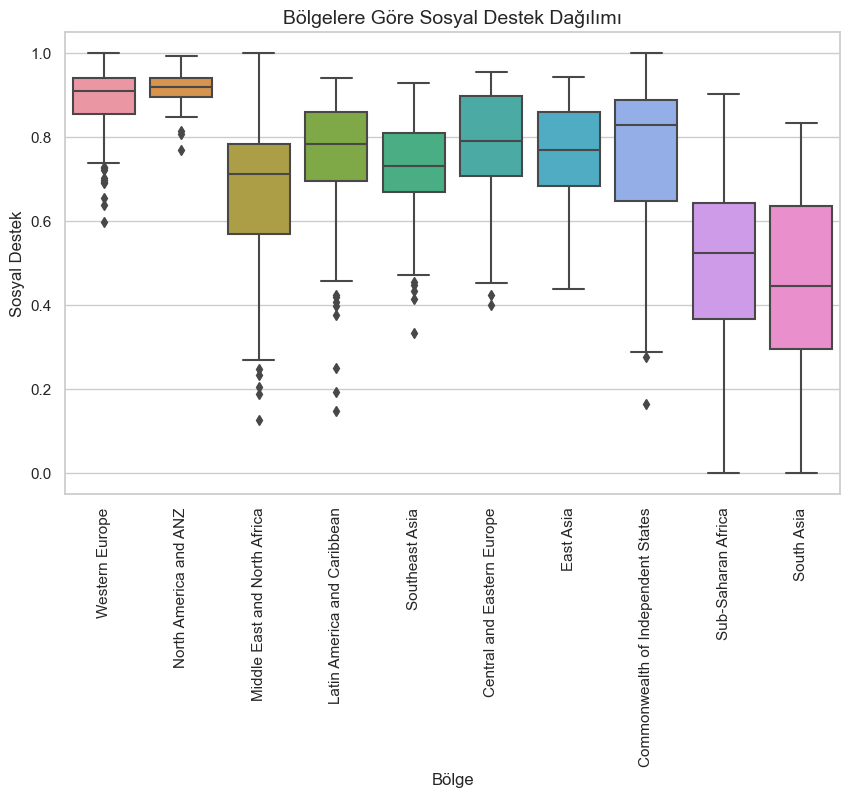

In [213]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Regional indicator", y="Social support", data=df)
plt.xticks(rotation=90)
plt.title("Bölgelere Göre Sosyal Destek Dağılımı", fontsize=14)
plt.xlabel("Bölge", fontsize=12)
plt.ylabel("Sosyal Destek", fontsize=12)
plt.show()

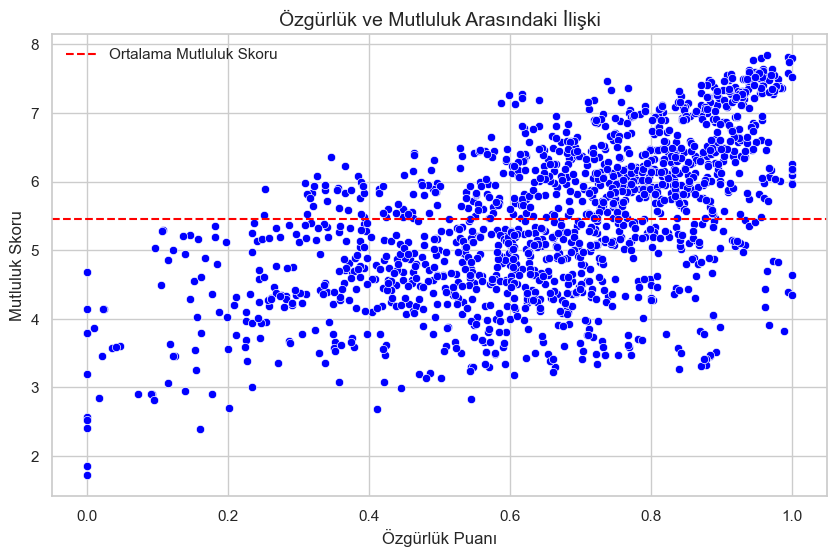

In [214]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Freedom to make life choices"], y=df["Happiness score"], color="blue")
plt.title("Özgürlük ve Mutluluk Arasındaki İlişki", fontsize=14)
plt.xlabel("Özgürlük Puanı", fontsize=12)
plt.ylabel("Mutluluk Skoru", fontsize=12)
plt.axhline(df["Happiness score"].mean(), color="red", linestyle="dashed", label="Ortalama Mutluluk Skoru")
plt.legend()
plt.show()

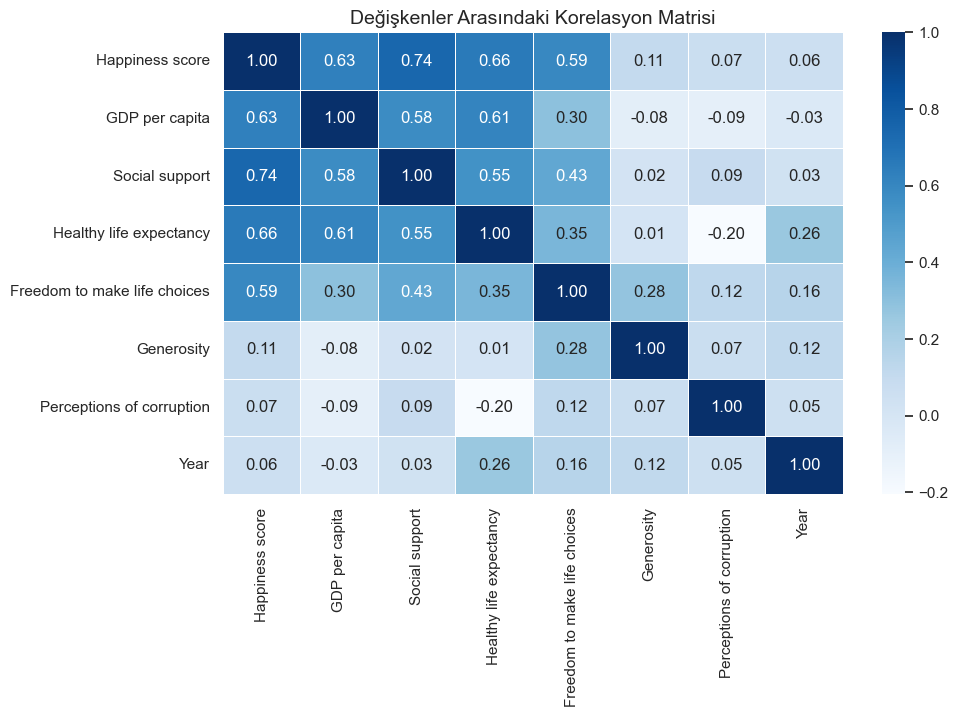

In [215]:
numeric_data = df.select_dtypes(include=["number"])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.title("Değişkenler Arasındaki Korelasyon Matrisi", fontsize=14)
plt.show()

In [216]:
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]

fig = px.choropleth(
    df,
    locations="Country", 
    locationmode="country names", 
    color="Happiness score", 
    hover_name="Country", 
    color_continuous_scale="Viridis",
    title=f"{latest_year} Yılı Dünya Mutluluk Haritası"
)

fig.show()

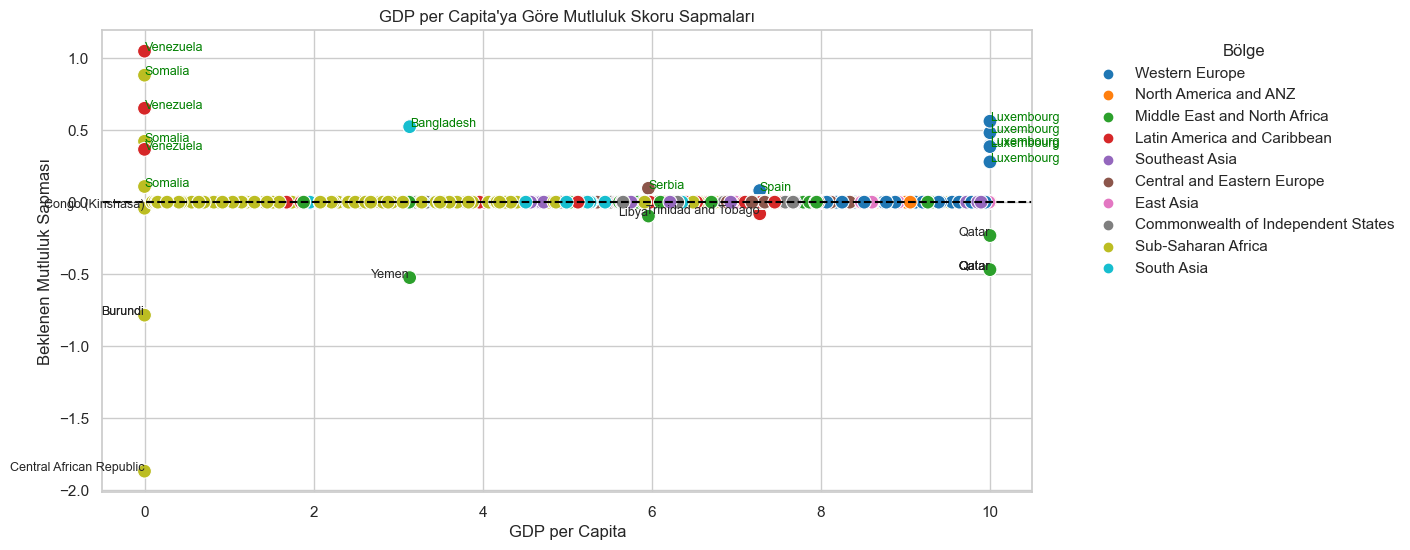

In [217]:
avg_happiness_by_gdp = df.groupby("GDP per capita")["Happiness score"].mean()

df["Happiness Deviation"] = df.apply(lambda row: row["Happiness score"] - avg_happiness_by_gdp[row["GDP per capita"]], axis=1)

low_happiness_countries = df[df["Happiness Deviation"] < 0]
high_happiness_countries = df[df["Happiness Deviation"] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="GDP per capita", y="Happiness Deviation", hue="Regional indicator", s=100, palette="tab10")

for i, row in low_happiness_countries.iterrows():
    plt.text(row["GDP per capita"], row["Happiness Deviation"], row["Country"], fontsize=9, ha='right')

for i, row in high_happiness_countries.iterrows():
    plt.text(row["GDP per capita"], row["Happiness Deviation"], row["Country"], fontsize=9, ha='left', color='green')

plt.axhline(0, color='black', linestyle='--')

plt.title("GDP per Capita'ya Göre Mutluluk Skoru Sapmaları")
plt.xlabel("GDP per Capita")
plt.ylabel("Beklenen Mutluluk Sapması")
plt.legend(title="Bölge", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [218]:
df = df.drop(columns=["Happiness Deviation"])


In [219]:
df.head()

,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015
1,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015
2,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015
3,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015
4,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015


Linear Regression Modeli:
MAE: 0.4222
MSE: 0.2816
R^2 Skoru: 0.7486

Random Forest Modeli:
MAE: 0.3434
MSE: 0.2118
R^2 Skoru: 0.8109

Gradient Boosting Modeli:
MAE: 0.3638
MSE: 0.2273
R^2 Skoru: 0.7970



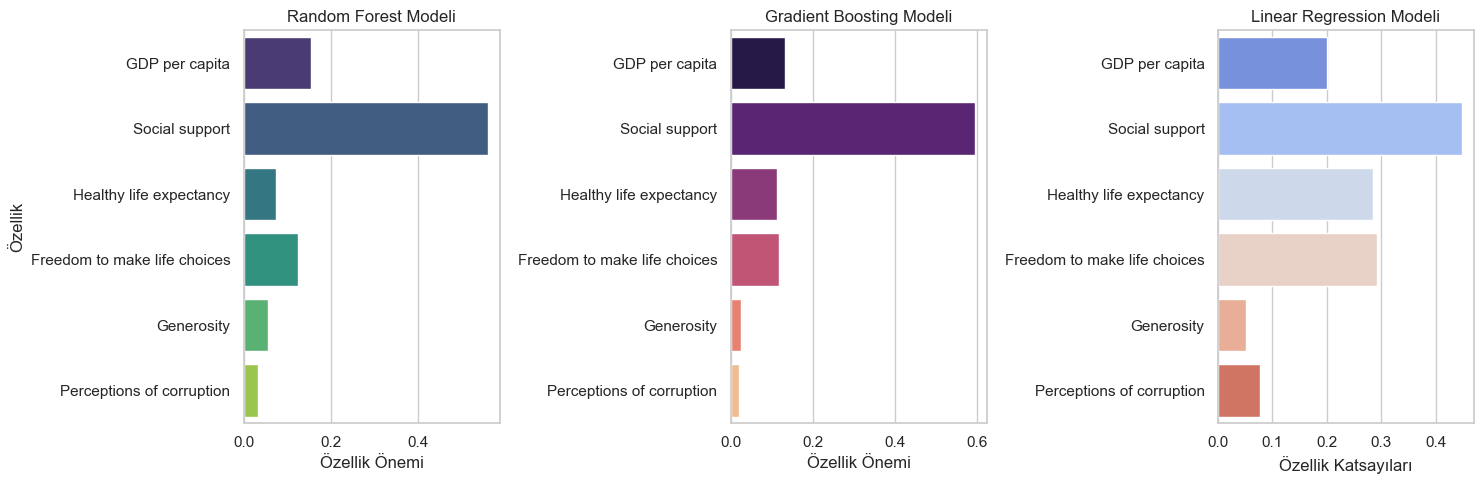

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#
# Gerekli sütunları seçme
columns = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", 
           "Generosity", "Perceptions of corruption", "Happiness score"]
df = df[columns].dropna()

# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(columns=["Happiness score"])
y = df["Happiness score"]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Modeli:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R^2 Skoru: {r2_score(y_test, y_pred):.4f}\n")

# Özellik önemlerini görselleştirme
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Modellerin özellik önemlerini görselleştirme
plt.figure(figsize=(15, 5))

# Rastgele Orman Modeli
plt.subplot(1, 3, 1)
rf_model = models["Random Forest"]
sns.barplot(x=rf_model.feature_importances_, y=feature_names, palette="viridis")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellik")
plt.title("Random Forest Modeli")

# Gradient Boosting Modeli
plt.subplot(1, 3, 2)
gb_model = models["Gradient Boosting"]
sns.barplot(x=gb_model.feature_importances_, y=feature_names, palette="magma")
plt.xlabel("Özellik Önemi")
plt.ylabel("")
plt.title("Gradient Boosting Modeli")

# Linear Regression Modeli (Katsayılar)
plt.subplot(1, 3, 3)
lr_model = models["Linear Regression"]
sns.barplot(x=np.abs(lr_model.coef_), y=feature_names, palette="coolwarm")  # Mutlak değer alındı
plt.xlabel("Özellik Katsayıları")
plt.ylabel("")
plt.title("Linear Regression Modeli")

plt.tight_layout()
plt.show()
